In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# We will not be concerned with NAN values. 
# The variables we will use are as follows: 
- ‘Location’, ‘MinTemp’, MaxTemp, WindGustDir, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Pressure9am, Pressure3pm.

In [2]:
d=pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
df=d.copy()
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
miss = df.isnull().sum().sort_values(ascending=False).head()
miss_per = (miss/len(df))*100
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799


In [5]:
df.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm','RainToday','RainTomorrow','Temp9am','Temp3pm','WindDir3pm','WindDir9am'],axis=1, inplace=True)

In [6]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Pressure9am,float64,130395,547,15065,980.5,1041.0
Pressure3pm,float64,130432,550,15028,977.1,1039.6
WindGustDir,object,135134,17,10326,NaN,NaN
WindGustSpeed,float64,135197,68,10263,6.0,135.0
Humidity3pm,float64,140953,102,4507,0.0,100.0
Rainfall,float64,142199,682,3261,0.0,371.0
WindSpeed3pm,float64,142398,45,3062,0.0,87.0
Humidity9am,float64,142806,102,2654,0.0,100.0
WindSpeed9am,float64,143693,44,1767,0.0,130.0
MinTemp,float64,143975,390,1485,-8.5,33.9


__________Data Types__________

float64    10
object      2
Name: Types, dtype: int64


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0
Pressure9am,130395.0,1017.649940,7.106530,980.5,1012.9,1017.6,1022.4,1041.0
Pressure3pm,130432.0,1015.255889,7.037414,977.1,1010.4,1015.2,1020.0,1039.6


In [8]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
MinTemp,1.000000,0.736555,0.103938,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292
MaxTemp,0.736555,1.000000,-0.074992,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167
Rainfall,0.103938,-0.074992,1.000000,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534
WindGustSpeed,0.177415,0.067615,0.133659,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749
WindSpeed9am,0.175064,0.014450,0.087338,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817
WindSpeed3pm,0.175173,0.050300,0.057887,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439
Humidity9am,-0.232899,-0.504110,0.224405,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858
Humidity3pm,0.006089,-0.508855,0.255755,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997
Pressure9am,-0.450970,-0.332061,-0.168154,-0.458744,-0.228743,-0.296351,0.139442,-0.027544,1.000000,0.961326
Pressure3pm,-0.461292,-0.427167,-0.126534,-0.413749,-0.175817,-0.255439,0.186858,0.051997,0.961326,1.000000


<AxesSubplot:>

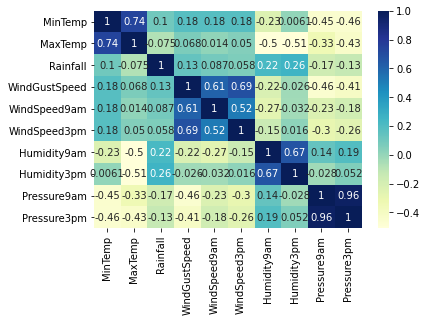

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

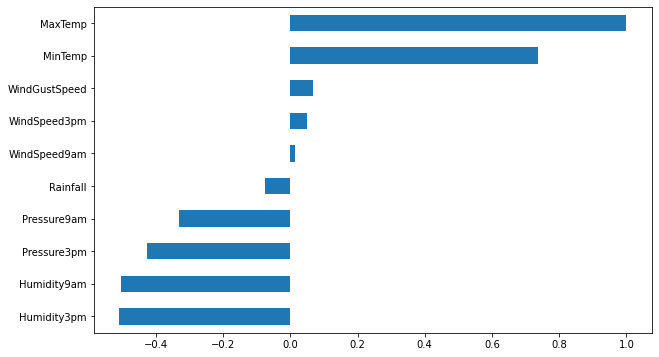

In [10]:
plt.figure(figsize=(10,6))
df.corr()["MaxTemp"].sort_values().plot.barh();

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

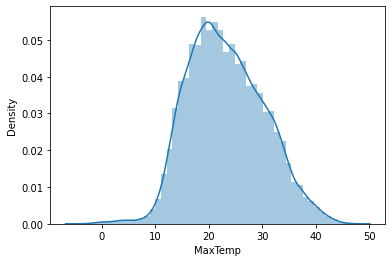

In [11]:
sns.distplot(df.MaxTemp)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

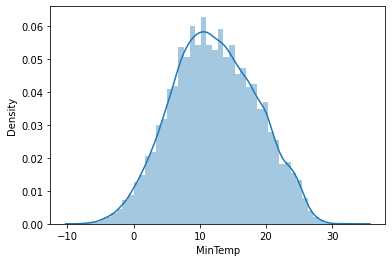

In [12]:
sns.distplot(df.MinTemp)

In [13]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
dtype: int64

<AxesSubplot:>

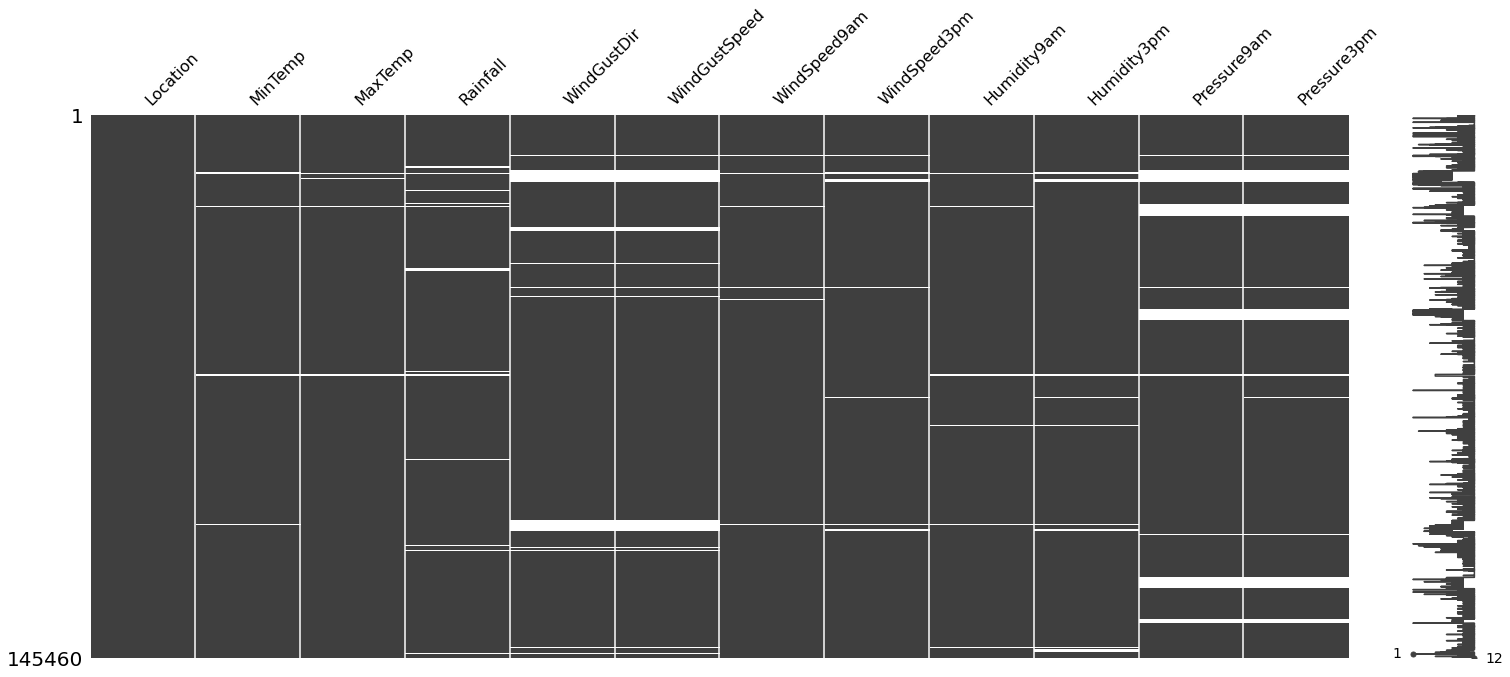

In [14]:
msno.matrix(df)

In [ ]:
# df.dropna(subset=['MinTemp','MaxTemp','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure3pm','Pressure9am'],inplace=True)

In [15]:
df.dropna(inplace=True)

<AxesSubplot:>

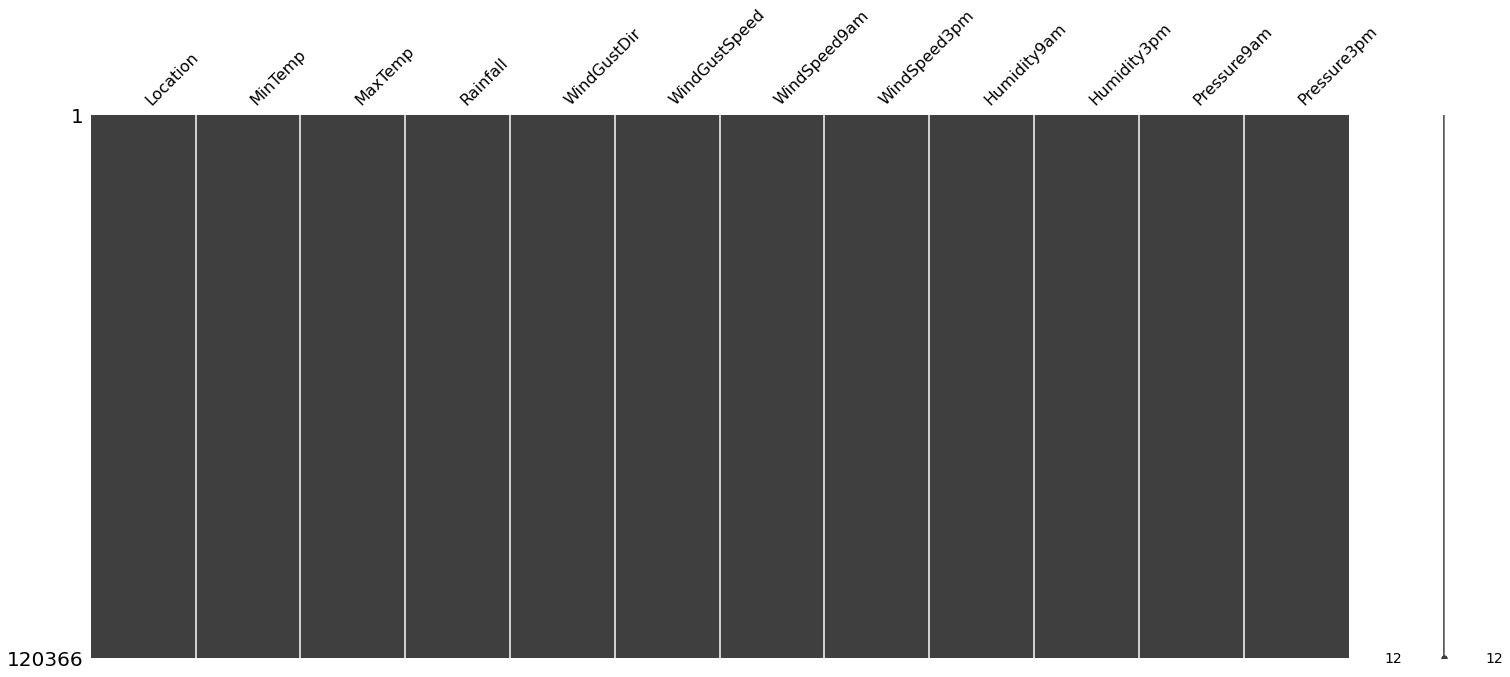

In [16]:
msno.matrix(df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='MaxTemp'>

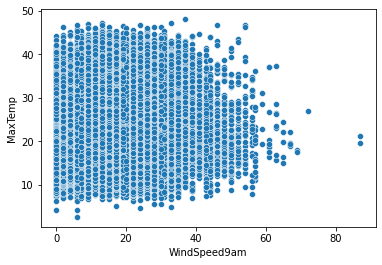

In [17]:
sns.scatterplot(x='WindSpeed9am',y='MaxTemp',data=df)

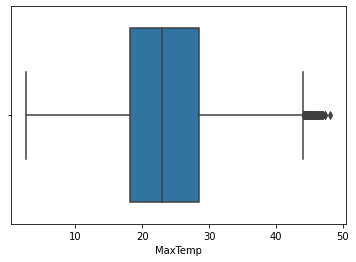

In [19]:
ax = sns.boxplot(x="MaxTemp", data=df)
# ax = sns.swarmplot(x="MaxTemp", data=df, color=".25")

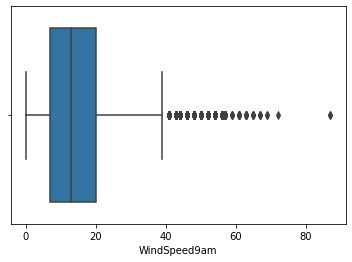

In [20]:
ax = sns.boxplot(x="WindSpeed9am", data=df)

# Model Kurulum

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

## Multiple Linear Regression

In [23]:
X=df.drop(['MaxTemp','WindGustDir','Location'],axis=1) # bagimsiz degiskenler. MaxTemp ve object olan column lar drop yapildi.
y=df[['MaxTemp']] # bagimli degiskenimiz.

### Data setini Train ve Test olarak Bolelim

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =50 ) 

In [25]:
print (' Test ve Train veri setlerindeki gözlem sayıları...')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

 Test ve Train veri setlerindeki gözlem sayıları...
X_train:  (96292, 9)
y_train:  (96292, 1)
X_test:  (24074, 9)
y_test:  (24074, 1)


- ilk olarak Statsmodel ile modelimizi kuracağız, detaylı istatistiksel sonuçları görebilmek için.

In [26]:
# X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                MaxTemp   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          7.991e+05
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                        0.00
Time:                        13:08:42   Log-Likelihood:                     -2.3630e+05
No. Observations:               96292   AIC:                                  4.726e+05
Df Residuals:                   96283   BIC:                                  4.727e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MinTemp           0.8318      0.002    538.792      0.000       0.829       0.835
Rainfall          0.0029      0.001      2.527      0.011       0.001       0.005
WindGustSpeed     0.0181      0.001     17.638      0.000       0.016       0.020
WindSpeed9am     -0.1026      0.001    -75.678      0.000      -0.105      -0.100
WindSpeed3pm     -0.0064      0.001     -4.331      0.000      -0.009      -0.003
Humidity9am      -0.0157      0.001    -21.545      0.000      -0.017      -0.014
Humidity3pm      -0.1499      0.001   -233.595      0.000      -0.151      -0.149
Pressure9am       0.5605      0.005    112.926      0.000       0.551       0.570
Pressure3pm      -0.5394      0.005   -108.196      0.000      -0.549      -0.530
==============================================================================
Omnibus:                     2617.479   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3883.846
Skew:                           0.286   Prob(JB):                         0.00
Kurtosis:                       3.800   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bu model ile tahmin yapalım

In [27]:
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1


In [29]:
veri = [[13.4],[0.6],[44.0],[20.0],[24.0],[71.0],[22.0],[1007.7],[1007.1]]
veri = pd.DataFrame(veri).T
veri

,0,1,2,3,4,5,6,7,8
0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1


In [30]:
model.predict(veri)

0    26.885142
dtype: float64

In [31]:
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse

2.839319442202939

In [32]:
# sk ile tekrar model kurulumu
X=df.drop(['MaxTemp','WindGustDir','Location'],axis=1) 
y=df[['MaxTemp']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =50 ) 

reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [33]:
# modelimizin bağımsız değişken katsayıları ve sabit değerlerine ulaşalım
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  [92.46696811]
Model coefficients:  [[ 0.79175422 -0.00180403 -0.00404411 -0.09277459 -0.00402993 -0.01581476
  -0.14963924  0.5104434  -0.57914176]]


In [34]:
# R2 ve Ortalama hata değerlerimiz
model.score(X_train, y_train)

0.8430100505428709

In [35]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

2.7698615176292987

## Cross validation

In [36]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2')

array([0.84485682, 0.8404941 , 0.8441519 , 0.84057413, 0.84270995,
       0.84573076, 0.84543948, 0.84010111, 0.84106198, 0.84443539])

In [37]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean()

0.8429555623293548

- aynı yöntemi mean_squared_error içinde uygulayalım. yani ortalama hata değerimizide valide edip sonucu görelim.

In [38]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())

2.770140573687217

In [39]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

2.789524918622464

- çoklu doğrusallık olduğunda yani bağımsız değişkenler arasındaki korelasyon(ilişki) çok yüksek oldugunda farklı modeller ile tahmin hatamızı daha da iyileştirip iyileştiremiyeceğimize bakmamız gerekiyor.
- Dumy

In [46]:
dmy = pd.get_dummies(df, columns = ['Location','WindGustDir'], drop_first=True)
dmy

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X2 = dmy.drop(['MaxTemp'], axis=1)
y2 = dmy['MaxTemp']
X2

,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Location_Albury,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1,...,0,0,0,0,0,0,0,0,1,0
2,12.9,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1,...,0,0,0,0,0,0,0,0,0,1
3,9.2,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1,...,0,0,0,0,0,0,0,0,0,0
4,17.5,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y2

0         22.9
1         25.1
2         25.7
3         28.0
4         32.3
          ... 
145454    21.8
145455    23.4
145456    25.3
145457    26.9
145458    27.0
Name: MaxTemp, Length: 120366, dtype: float64

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state =50)

In [50]:
reg = LinearRegression()
model2 = reg.fit(X2_train, y2_train)

In [51]:
model2.score(X2_train, y2_train)

0.864905960422875

In [52]:
cross_val_score(model2, X2_train, y2_train, cv = 10, scoring = 'r2').mean()

0.8646946484465161

In [53]:
np.sqrt(mean_squared_error(y2_train, model2.predict(X2_train)))

2.569450324359459

In [54]:
np.sqrt(-cross_val_score(model2, X2_train, y2_train, cv=10, scoring='neg_mean_squared_error').mean())

2.5712823316026774

In [55]:
model2.score(X2_test, y2_test)

0.8615758954291889

In [56]:
np.sqrt(mean_squared_error(y2_test, model2.predict(X2_test)))

2.5870493736539824

## Ridge Regression

- kategorik degiskenlerimiz icin gerekli normalizasyonu uygulamistik yukari kisimda.

In [57]:
X_train.shape

(96292, 9)

In [58]:
ridge_model = Ridge().fit(X_train, y_train)

In [59]:
ridge_model

Ridge()

- Ridge modelde alpha değeri manuel olarak girilir ve herhangi bir değer girilmediğinde bu değer 1.0 olarak kabul edilir. alpha değeri modeldeki katsayıların etkisini azaltıp arttırmaktır, böylece bağımsız değişkenlerin sonuç üzerine etkisi ayarlanmış olur. bu şekilde aşırı öğrenme problemlerinin önüne geçilmiş olabilir. aşırı öğrenme problemlerinde model train veri setinde çok yüksek score değerine ulaşırken test veri setinde score değeri ciddi oranda düşer.

- alpha nın değeri arttıkca katsayılar sıfıra daha cok yaklaşır. bağımsız değişkenlerin etkileri azalır. bu durum modelin eğitim verilerindeki başarısını azaltırken, modelin genelleştirmesine yardım edebilir. 

In [60]:
ridge_model.score(X_train, y_train) , ridge_model.score(X_test, y_test)

(0.843010050542071, 0.8390604443881738)

In [61]:
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

(2.7698615176363552, 2.789524979444252)

In [62]:
# alpha değerini 10000 yapalım
ridge_model = Ridge(alpha=10000).fit(X_train, y_train)
ridge_model

Ridge(alpha=10000)

In [63]:
ridge_model.score(X_train, y_train) , ridge_model.score(X_test, y_test)

(0.8429386472283015, 0.8389246535862733)

In [64]:
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

(2.7704913503365054, 2.7907015452856143)

In [65]:
# bir de bahsettigimiz katsayı değişimini grafik üzerinde görelim
np.linspace(100,0.0001,1000)

array([1.00000e+02, 9.98999e+01, 9.97998e+01, 9.96997e+01, 9.95996e+01,
       9.94995e+01, 9.93994e+01, 9.92993e+01, 9.91992e+01, 9.90991e+01,
       9.89990e+01, 9.88989e+01, 9.87988e+01, 9.86987e+01, 9.85986e+01,
       9.84985e+01, 9.83984e+01, 9.82983e+01, 9.81982e+01, 9.80981e+01,
       9.79980e+01, 9.78979e+01, 9.77978e+01, 9.76977e+01, 9.75976e+01,
       9.74975e+01, 9.73974e+01, 9.72973e+01, 9.71972e+01, 9.70971e+01,
       9.69970e+01, 9.68969e+01, 9.67968e+01, 9.66967e+01, 9.65966e+01,
       9.64965e+01, 9.63964e+01, 9.62963e+01, 9.61962e+01, 9.60961e+01,
       9.59960e+01, 9.58959e+01, 9.57958e+01, 9.56957e+01, 9.55956e+01,
       9.54955e+01, 9.53954e+01, 9.52953e+01, 9.51952e+01, 9.50951e+01,
       9.49950e+01, 9.48949e+01, 9.47948e+01, 9.46947e+01, 9.45946e+01,
       9.44945e+01, 9.43944e+01, 9.42943e+01, 9.41942e+01, 9.40941e+01,
       9.39940e+01, 9.38939e+01, 9.37938e+01, 9.36937e+01, 9.35936e+01,
       9.34935e+01, 9.33934e+01, 9.32933e+01, 9.31932e+01, 9.309

ValueError: x and y can be no greater than 2D, but have shapes (10000,) and (10000, 1, 9)

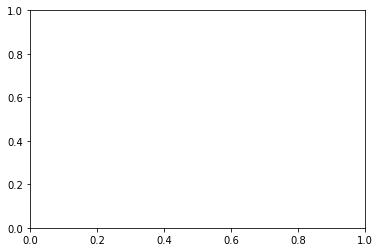

In [66]:
lambdalar = np.linspace(100,0.0001,10000)
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax=plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Ridge Katsayıları')

In [67]:
# Tahmin ve optimum alpha değerinin bulunması
alphaCV = RidgeCV(alphas = lambdalar, 
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

In [68]:
alphaCV.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+02, 9.99899990e+01, 9.99799980e+01, ...,
       2.01019802e-02, 1.01009901e-02, 1.00000000e-04]),
        normalize=True, scoring='neg_mean_squared_error')

In [69]:
alphaCV.alpha_

0.0001

In [70]:
alphaCV.coef_

array([[ 0.79166509, -0.001826  , -0.00407933, -0.09280808, -0.00403464,
        -0.01584883, -0.14964285,  0.50886844, -0.57761192]])

In [71]:
ridge_tuned = Ridge(alpha= alphaCV.alpha_,
                   normalize = True).fit(X_train,y_train)

In [72]:
ridge_tuned.score(X_train,y_train)

0.8430098737981863

In [73]:
ridge_tuned.score(X_test,y_test), np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

(0.8390566990103957, 2.7895574381025514)

- test verileri başarı oranı ve hata tahmini değerleri bir önceki model olan coklu doğrulsal regresyon ile karşılaştırıldığında , çoklu doğrusal regresyonun çok az daha iyi sonuç verdiği görülmekte. bu nasıl olabilir?. şöyle bir yorum yapabiliriz. rigde regresyonun bulduğu optimum alpha değeri yukarıdada görüldüğü gibi 0,0001 yani nerdeyse sıfır, aslında bizim lambdalar için oluşturduğumuz en düşük sayı olan 0,0001 değerini seçmiş. biz biliyoruzki aslında alpha değeri sıfır olsa modelimiz çoklu doğrusal regresyon förmülü oluyor. bu veri seti için aslında ridge regresyonun bize sağladığı herhangi bir avantaj yok. buda modelimizde herhangi bir overfitting olmadığınıda gösteriyor. çoklu doğrusallık olsada ridge regresyonun formül yapısı ile bu veri seti için bize herhangi bir avantaj sağlamadı.



# Lasso Regression

In [75]:
lasso_model = Lasso().fit(X_train, y_train)
lasso_model

Lasso()

In [76]:
lasso_model.score(X_train, y_train) , lasso_model.score(X_test, y_test)

(0.8243337310702846, 0.8195837508675847)

In [77]:
np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))

(2.9299912293229236, 2.9534979967535704)

- Lasso modelin katsayısını '0' sıfır yaptığı bağımsız değişken varmı diye bir bakalım isterseniz

In [78]:
# katsayısı sıfır olmayan kac değişken var?.
np.sum(lasso_model.coef_!=0)

6

In [79]:
lasso_model.coef_

array([ 0.77005603, -0.        , -0.01349845, -0.09362488, -0.        ,
       -0.01616096, -0.16101149,  0.        , -0.07578222])

- Lasso modeli 9 değişkenden 3 tanesini sıfıra eşitlemiş, yani modelden çıkarmış.

In [81]:
# modelimiz için optimum alpha değerini bulup sonuçlara bakalım
lasso_model_cv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)

In [84]:
lasso_model_cv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=10, max_iter=10000, normalize=True)

In [83]:
lasso_model_cv.alpha_

1.6494572107486228e-05

- optimum alpha değerimizi bulduğumuza göre modelimizi fit edip , sonucları değerlendirelim.

In [85]:
lasso_optimum = Lasso(alpha= lasso_model_cv.alpha_) 

In [86]:
lasso_optimum.fit(X_train, y_train)

Lasso(alpha=1.6494572107486228e-05)

In [87]:
lasso_optimum.score(X_train, y_train) , lasso_optimum.score(X_test, y_test)

(0.8430100505362761, 0.8390604316566767)

In [88]:
np.sqrt(mean_squared_error(y_train, lasso_model_cv.predict(X_train))) , np.sqrt(mean_squared_error(y_test, lasso_model_cv.predict(X_test)))

(2.770125281583983, 2.790160306118189)

- bu veri seti için optimum alpha değeri sonuçlarımızda küçük bir iyileşme sağladı.

# Elasticnet Regression

In [92]:
elas_model = ElasticNet().fit(X_train, y_train)

In [93]:
elas_model.coef_ , elas_model.intercept_

(array([ 0.76857767, -0.        , -0.01252544, -0.09442717, -0.        ,
        -0.01794803, -0.15642165,  0.16343762, -0.24220451]),
 array([104.5829057]))

In [94]:
elas_model.score(X_train, y_train) , elas_model.score(X_test, y_test) 

(0.8343137703576424, 0.8298028898987839)

In [96]:
y_tahmin = elas_model.predict(X_test)
y_tahmin

array([21.74443447, 34.49849296, 24.52366001, ..., 25.82700135,
       22.06765716, 15.56234667])

In [97]:
np.sqrt(mean_squared_error(y_test, y_tahmin))

2.868632712909419

In [98]:
np.sqrt(mean_squared_error(y_train, elas_model.predict(X_train))), np.sqrt(mean_squared_error(y_test, elas_model.predict(X_test)))

(2.8455442225897767, 2.868632712909419)

- ElasticNet regresyonu icin optimum parametreleri belirleme - model tuning işlemleri

In [102]:
elas_model_cv= ElasticNetCV(cv=10, random_state = 50).fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [103]:
elas_model_cv.alpha_

0.14458864520125783

In [104]:
elas_model_cv.coef_

array([ 0.78860246, -0.00157214, -0.00564485, -0.09346314, -0.00307123,
       -0.01615738, -0.15095223,  0.44775989, -0.5179832 ])

In [105]:
elas_optimum = ElasticNet(alpha = elas_model_cv.alpha_, l1_ratio=0.5).fit(X_train, y_train)
elas_optimum

ElasticNet(alpha=0.14458864520125783)

In [106]:
elas_optimum.score(X_train, y_train) , elas_optimum.score(X_test, y_test)

(0.8427325166169342, 0.8386587231723317)

In [107]:
np.sqrt(mean_squared_error(y_train, elas_optimum.predict(X_train))) , np.sqrt(mean_squared_error(y_test, elas_optimum.predict(X_test)))

(2.7723087796826347, 2.7930042762026024)

- Bu veri setimiz için ElasticNet regresyon benzer sonuçları verdi diyebiliriz.

In [108]:
dmy.head(1)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0


- kurduğumuz modele bağımsız değişkenlerin değerlerini girerek, herhangi bir gözlem için tahmin yaptıralım. 

In [110]:
veri

,0,1,2,3,4,5,6,7,8
0,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1


In [111]:
y_pred = elas_optimum.predict(veri)
y_pred

array([27.80381858])

- farklı bir tahmin değeri aldık. bu veri setimiz için elasticNet regresyonunun pek uygun olmadığını görmüş olduk.